In [1]:
using Oceananigans
using JLD2
using CairoMakie
using Statistics
using ImageFiltering: imfilter, Kernel.gaussian

[ Info: Oceananigans will use 4 threads


In [9]:
include("../src/figures/energy_loss.jl")
include("../src/figures/streamfunction_terms.jl")
include("../src/figures/xz_states.jl")

xz_states (generic function with 1 method)

In [2]:
runnames = ["Ri000", "Ri010", "Ri020"]
foldernames = map(runnames) do runname
    "../../scratch/filament-instability/$runname"
end
runlabels = [L"0.00", L"0.10", L"0.20"]
legendtitle = L"\text{Ri}";

# Energy loss from thermal wind state

## Fluxes

### Sum

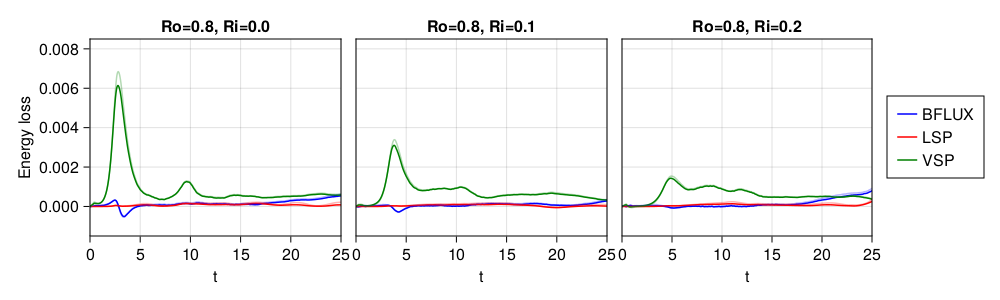

In [15]:
energy_loss_fig = energy_loss(runnames; resolution=(1000, 300))
save("../output/poster_figures/energy_loss.png", energy_loss_fig; px_per_unit=2)
energy_loss_fig

# Streamfunction

## Term balance

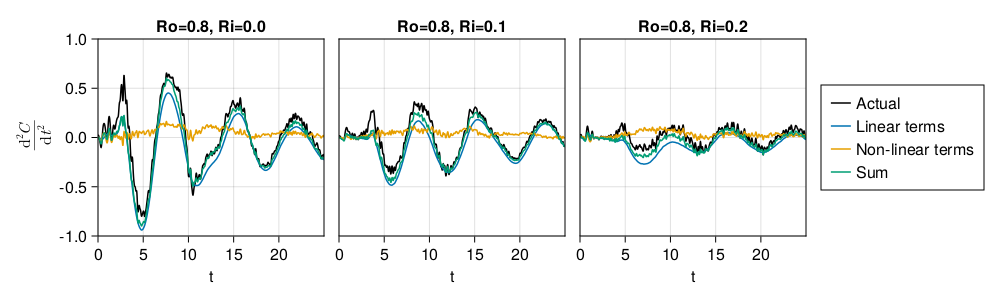

In [ ]:
ψterms_fig = ψterms_plot(foldernames; resolution=(1000, 300),  σ=5)
save("../output/poster_figures/streamfunction_terms.png", ψterms_fig; px_per_unit=2)
ψterms_fig

# State

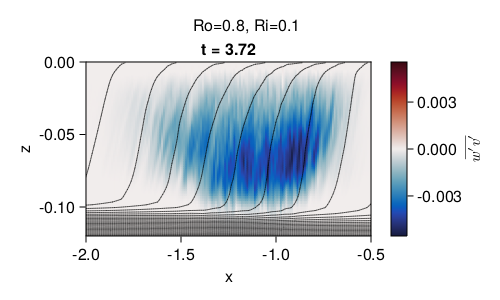

In [15]:
runname = runnames[2]
foldername = foldernames[2]
fig = xz_states(foldername, [373]; σ=0, resolution=(500, 300), field="w′v′", limits=(-2.0, -0.5, -0.12, 0))
save("../output/poster_figures/xz_states_fluc_$runname.png", fig; px_per_unit=2)
fig
fig = xz_states(foldername, [473]; σ=0, resolution=(500, 300), field="w′v′", limits=(-2.0, -0.5, -0.12, 0))
save("../output/poster_figures/xz_states_fluc2_$runname.png", fig; px_per_unit=2)
fig

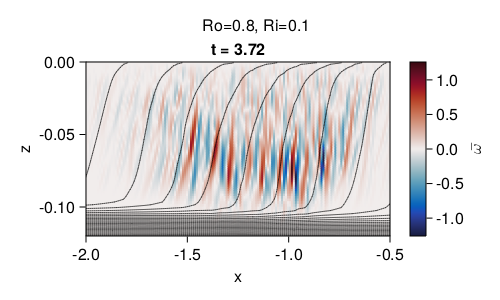

In [17]:
runname = runnames[2]
foldername = foldernames[2]
fig = xz_states(foldername, [373]; σ=0, resolution=(500, 300), field="ω", limits=(-2.0, -0.5, -0.12, 0))
save("../output/poster_figures/xz_states_omega_$runname.png", fig; px_per_unit=2)
fig
fig = xz_states(foldername, [473]; σ=0, resolution=(500, 300), field="ω", limits=(-2.0, -0.5, -0.12, 0))
save("../output/poster_figures/xz_states_omega2_$runname.png", fig; px_per_unit=2)
fig

In [1]:
include("../src/figures/xt_energy_loss.jl")

[ Info: Oceananigans will use 4 threads


xt_energy_loss (generic function with 1 method)

In [3]:
data = xt_energy_loss_data(foldernames[2]);

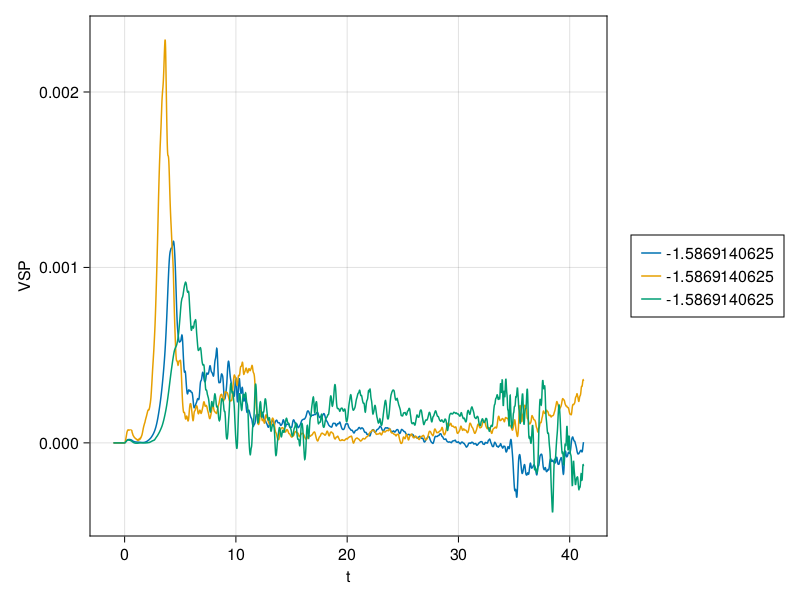

In [149]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="t", ylabel="VSP")
ln1 = lines!(ax, data.ts, data.VSP[:, 350])
ln2 = lines!(ax, data.ts, data.VSP[:, 400])
ln3 = lines!(ax, data.ts, data.VSP[:, 450])
Legend(fig[1, 2], [ln1, ln2, ln3], ["$(data.xs[350])", "$(data.xs[350])", "$(data.xs[350])"])
fig

In [119]:
using CurveFit

In [133]:
growth_rates = [linear_fit(data.ts[301:growth_times[i]], log.(abs.(data.VSP[301:growth_times[i], i])))[2] for i in 1:1024];

In [135]:
using CairoMakie
include("../src/parameters.jl")
include("../src/filament_state.jl")
sp = create_simulation_parameters(; Ri=0.1, Ro=0.8, α=1.5)
(b, v) = get_filament_state(sp)
xs = range(-5, 5, 1024)
zs = range(-1.5sp.H, 0, 256)
@inline ∂x(a) = (x, z) -> (a(x+5e-4, z) - a(x-5e-4, z)) / 1e-3
@inline ∂z(a) = (x, z) -> (a(x, z+5e-4) - a(x, z-5e-4)) / 1e-3
@inline PV(b, v) = (x, z) -> (∂x(v)(x, z) + 1) * ∂z(b)(x, z) - ∂z(v)(x, z) * ∂x(b)(x, z)
@inline invRi(b, v) = (x, z) -> ∂z(v)(x, z) * ∂z(v)(x, z) / ∂z(b)(x, z);

inv_Ri_top = invRi(b, v).(xs, 0)
growth_rate = sqrt.(map(x->x<0 ? 0 : x, inv_Ri_top .- 1));

┌ Info: Created simulation parameters
│ Input:
│  Ro=0.8
│  Ri=0.1
│  Ek=0
│  α=1.5
│  λ=0.05
│  δ=-0.25
│  β=0.1
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=47.799220120223936
│  Nb=3.5913038373553356
│  ℓ=1.5
│  ν=0.0
│  Lz=0.25
│  κ=0.0
└  B₀=0.0
[ Info: Filament state created: Ro=1.8532731708566212, Ro_min=0.7999991463550904, Fr₀=0.038772037832318064, Frb=0.5160446608776456, Ri_min=0.10177366052884107


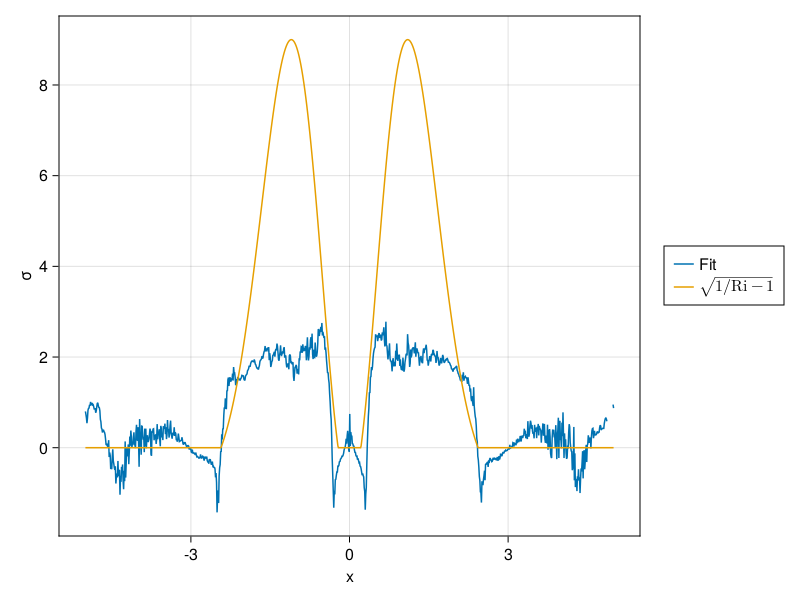

In [150]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel="x", ylabel="σ")
ln1 = lines!(ax, data.xs, growth_rates)
ln2 = lines!(ax, data.xs, growth_rate .^2)
Legend(fig[1, 2], [ln1, ln2], ["Fit", L"\sqrt{1/\text{Ri} - 1}"])
fig

In [142]:
?Label

search: Label labelslider! labelslidergrid! @label zlabel! ylabel! xlabel!



# `Label <: Block`

## Attributes

**Label attributes**:

  * `color`: The color of the text. Default: `#= /home/n/ngrisoua/atkin163/.julia/packages/Makie/gAmAB/src/makielayout/types.jl:615 =# @inherit :textcolor :black`
  * `font`: The font family of the text. Default: `:regular`
  * `fontsize`: The font size of the text. Default: `#= /home/n/ngrisoua/atkin163/.julia/packages/Makie/gAmAB/src/makielayout/types.jl:617 =# @inherit :fontsize 16.0f0`
  * `justification`: The justification of the text (:left, :right, :center). Default: `:center`
  * `lineheight`: The lineheight multiplier for the text. Default: `1.0`
  * `padding`: The extra space added to the sides of the text boundingbox. Default: `(0.0f0, 0.0f0, 0.0f0, 0.0f0)`
  * `rotation`: The counterclockwise rotation of the text in radians. Default: `0.0`
  * `text`: The displayed text string. Default: `"Text"`
  * `visible`: Controls if the text is visible. Default: `true`
  * `word_wrap`: Enable word wrapping to the suggested width of the Label. Default: `false`

**Layout attributes**:

  * `alignmode`: The align mode of the text in its parent GridLayout. Default: `Inside()`
  * `halign`: The horizontal alignment of the text in its suggested boundingbox Default: `:center`
  * `height`: The height setting of the text. Default: `Auto()`
  * `tellheight`: Controls if the parent layout can adjust to this element's height Default: `true`
  * `tellwidth`: Controls if the parent layout can adjust to this element's width Default: `true`
  * `valign`: The vertical alignment of the text in its suggested boundingbox Default: `:center`
  * `width`: The width setting of the text. Default: `Auto()`
